In [6]:
import csv
import numpy as np
import pandas as pd
from numpy import array
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
import scikitplot as skplt

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from datetime import date
import datetime
import os

In [7]:
# Create folder to save results in
identify = 'ClassificationSKL_ValidationSet4_28'
folder_name = '/Users/clausholm/Documents/Python/Master_thesis/Data/test_results/'+identify
#os.mkdir(folder_name)

# Load Dataset
# Classification database
df = pd.read_csv('database/ClassificationDataset.csv', sep=';', index_col=0, decimal=',')

df

,1,2,3,4,5,6,7,8,9,10,...,156,157,158,159,160,cluster,Slope28,Slope56,FirstWeek,ArtistPopularity
Adel Tawil - Unsere Lieder,35,33,61,54,146,165,188,199,212,125,...,40,47,21,30,33,2,-1.043956,4.331868,682,63
Alec Benjamin Feat. Alessia Cara - Let Me Down Slowly,2,7,12,13,21,19,15,15,16,13,...,828,833,841,848,817,3,-1.351648,-0.208791,89,81
Andreas Bourani - Auf uns,1,1,3,3,2,31,27,12,29,56,...,594,599,634,567,621,3,2.964835,2.892308,68,56
Annenmaykantereit - Marie,34,57,84,99,119,128,132,140,126,139,...,33,28,29,33,30,2,0.560440,0.881319,653,72
Ariana Grande - 7 rings,231,272,279,302,325,326,372,311,358,356,...,173,154,156,146,159,5,3.496703,0.808791,2107,91
Ava Max - So Am I,82,111,123,97,105,165,308,299,326,304,...,687,713,757,706,774,4,16.145055,15.619780,991,84
Ava Max - Sweet but Psycho,72,158,184,208,188,191,244,204,239,238,...,896,837,830,844,901,4,32.140659,1.907692,1245,84
Bausa - Was Du Liebe nennst,1,3,2,4,8,23,47,50,75,84,...,343,303,313,313,315,5,14.621978,6.428571,88,74
C Arma - Yapma - Radio Edit,2,5,2,0,2,5,3,3,2,8,...,1,1,1,3,1,2,-0.432967,-0.213187,19,57
Calvin Harris & Ragnbone Man - Giant,111,128,196,221,307,378,432,529,423,532,...,655,729,741,688,663,4,25.305495,-1.632967,1773,86


In [8]:
# Split train dataset into input and output days. Change value of input_days
n_steps_in = 28


In [9]:
# define the train data input and output
df2 = df['cluster']
df_Slope28 = df['Slope28']
#df_Slope56 = df['Slope56']
df_FirstWeek = df['FirstWeek']
df_ArtistP = df['ArtistPopularity']

df = df.iloc[:, 0:n_steps_in]

df['cluster'] = df2
df['Slope28'] = df_Slope28 
#df['Slope56'] = df_Slope56
df['FirstWeek'] = df_FirstWeek
df['ArtistPopularity'] = df_ArtistP

df

,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,cluster,Slope28,FirstWeek,ArtistPopularity
Adel Tawil - Unsere Lieder,35,33,61,54,146,165,188,199,212,125,...,289,259,207,229,292,231,2,-1.043956,682,63
Alec Benjamin Feat. Alessia Cara - Let Me Down Slowly,2,7,12,13,21,19,15,15,16,13,...,20,25,15,17,16,30,3,-1.351648,89,81
Andreas Bourani - Auf uns,1,1,3,3,2,31,27,12,29,56,...,93,59,104,90,78,97,3,2.964835,68,56
Annenmaykantereit - Marie,34,57,84,99,119,128,132,140,126,139,...,112,143,129,135,133,120,2,0.560440,653,72
Ariana Grande - 7 rings,231,272,279,302,325,326,372,311,358,356,...,443,444,425,502,493,461,5,3.496703,2107,91
Ava Max - So Am I,82,111,123,97,105,165,308,299,326,304,...,538,588,596,666,656,706,4,16.145055,991,84
Ava Max - Sweet but Psycho,72,158,184,208,188,191,244,204,239,238,...,575,653,629,802,742,790,4,32.140659,1245,84
Bausa - Was Du Liebe nennst,1,3,2,4,8,23,47,50,75,84,...,183,216,216,286,309,339,5,14.621978,88,74
C Arma - Yapma - Radio Edit,2,5,2,0,2,5,3,3,2,8,...,6,2,4,3,3,10,2,-0.432967,19,57
Calvin Harris & Ragnbone Man - Giant,111,128,196,221,307,378,432,529,423,532,...,923,928,794,948,939,1052,4,25.305495,1773,86


,1,2,3,4,5,6,7,8,9,10,...,27,28,Slope28,FirstWeek,ArtistPopularity,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5
Adel Tawil - Unsere Lieder,35,33,61,54,146,165,188,199,212,125,...,292,231,-1.043956,682,63,0,1,0,0,0
Alec Benjamin Feat. Alessia Cara - Let Me Down Slowly,2,7,12,13,21,19,15,15,16,13,...,16,30,-1.351648,89,81,0,0,1,0,0
Annenmaykantereit - Marie,34,57,84,99,119,128,132,140,126,139,...,133,120,0.560440,653,72,0,1,0,0,0
Ariana Grande - 7 rings,231,272,279,302,325,326,372,311,358,356,...,493,461,3.496703,2107,91,0,0,0,0,1
Ava Max - Sweet but Psycho,72,158,184,208,188,191,244,204,239,238,...,742,790,32.140659,1245,84,0,0,0,1,0
Bausa - Was Du Liebe nennst,1,3,2,4,8,23,47,50,75,84,...,309,339,14.621978,88,74,0,0,0,0,1
C Arma - Yapma - Radio Edit,2,5,2,0,2,5,3,3,2,8,...,3,10,-0.432967,19,57,0,1,0,0,0
Calvin Harris & Ragnbone Man - Giant,111,128,196,221,307,378,432,529,423,532,...,939,1052,25.305495,1773,86,0,0,0,1,0
Childish Gambino - This Is America,25,51,46,48,37,49,82,78,80,83,...,124,125,1.254945,338,79,0,1,0,0,0
Chris Brown - Undecided,41,68,75,108,111,103,98,111,120,136,...,146,134,-1.191209,604,89,0,1,0,0,0


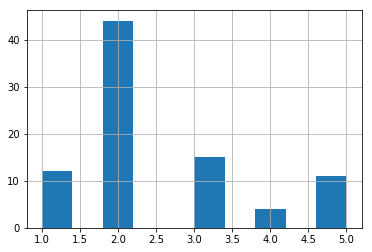

In [10]:

# Split into train and test set 
test_songs = ['Katy Perry - Never Really Over' , 
              'Taylor Swift - You Need To Calm Down', 
              'Shawn Mendes & Camila Cabello - Senorita', 
              'Ava Max - So Am I', 
              'Andreas Bourani - Auf uns', 
              'Meduza feat. Goodboys - Piece Of Your Heart', 
              'Pietro Lombardi - Nur Ein Tanz', 
              'Loud Luxury feat. brando - Body', 
              'Mark Forster - Sowieso', 
              'Camila Cabello feat. Young Thug - Havana',  ] 

"""
test_songs = ['Dotan - Numb' , 
              'The Script - The Last Time', 
              'Mark Ronson feat. Miley Cyrus - Nothing Breaks Like A Heart', 
              'Dynoro & Gigi Dagostino - In My Mind', 
              'Lea - Zu dir', 
              'Marshmello feat. Chvrches - Here With Me', 
              'Kygo & Whitney Houston - Higher Love', 
              'Calvin Harris & Ragnbone Man - Giant', 
              'Bausa - Was Du Liebe nennst', 
              'Lotte & Max Giesinger - Auf das, was da noch kommt',  ]
"""
# create scaler
#scaler = MinMaxScaler()
scaler = StandardScaler()

# Test
test = df.loc[ test_songs , : ]

# Train
train = df.drop(test_songs)

# Show train set
train['cluster'].hist();train.head()

# For Train set, use get_dummies to create columns for each stars and show whther there is a value or not (0 or 1)  
train = pd.get_dummies(train, columns = ['cluster'])

train

,1,2,3,4,5,6,7,8,9,10,...,27,28,Slope28,FirstWeek,ArtistPopularity,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5
Katy Perry - Never Really Over,145,204,222,250,182,300,391,376,377,349,...,601,551,13.843956,1694,85,0,0,0,0,1
Taylor Swift - You Need To Calm Down,70,109,202,210,222,199,205,226,297,362,...,476,487,10.740659,1217,91,0,0,0,0,1
Shawn Mendes & Camila Cabello - Senorita,322,640,569,659,666,744,750,769,781,835,...,1217,1170,9.989011,4350,89,0,0,0,1,0
Ava Max - So Am I,82,111,123,97,105,165,308,299,326,304,...,656,706,16.145055,991,84,0,0,0,1,0
Andreas Bourani - Auf uns,1,1,3,3,2,31,27,12,29,56,...,78,97,2.964835,68,56,0,0,1,0,0
Meduza feat. Goodboys - Piece Of Your Heart,3,0,0,4,1,1,0,10,8,10,...,23,24,1.024176,9,81,0,0,1,0,0
Pietro Lombardi - Nur Ein Tanz,23,36,31,42,46,41,55,55,58,55,...,34,63,-2.342857,274,66,0,1,0,0,0
Loud Luxury feat. brando - Body,8,0,2,1,0,1,5,13,3,5,...,10,9,0.050549,17,75,0,1,0,0,0
Mark Forster - Sowieso,31,47,61,75,97,120,118,120,144,136,...,334,324,10.659341,549,67,1,0,0,0,0
Camila Cabello feat. Young Thug - Havana,74,117,99,143,123,128,126,147,126,153,...,358,471,13.912088,810,90,1,0,0,0,0


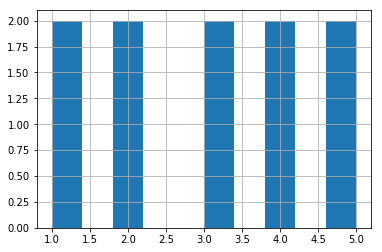

In [11]:
# Show train set
test['cluster'].hist();test.head()

# For Test set, use get_dummies to create columns for each stars and show whther there is a value or not (0 or 1)
test = pd.get_dummies(test, columns = ['cluster'])

test

In [12]:
# prepare configuration for cross validation test harness
seed = 7

max_iter = 10000
# prepare models
models = []
models.append(('LR', LogisticRegression(max_iter=max_iter)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)))
models.append(('ET', ExtraTreesClassifier(n_estimators=100, random_state=0)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(probability=True)))
models.append(('MLP', MLPClassifier(alpha=1, max_iter=max_iter, hidden_layer_sizes=1000)))
models.append(('AdaB', AdaBoostClassifier()))     
models.append(('GP', GaussianProcessClassifier(1.0 * RBF(1.0))))
models.append(('QD', QuadraticDiscriminantAnalysis()))


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

CV score for class cluster_1 is 0.7553366174055829
CV score for class cluster_2 is 0.8017241379310344
CV score for class cluster_3 is 0.6625615763546798
CV score for class cluster_4 is 0.9651067323481116
CV score for class cluster_5 is 0.8378489326765188

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.25      0.50      0.33         2
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         2
           5       0.50      0.50      0.50         2

    accuracy                           0.20        10
   macro avg       0.15      0.20  

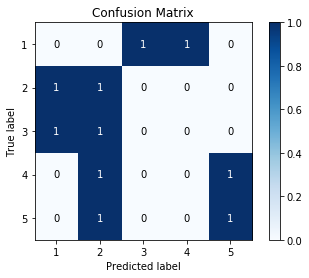

------------------------------------------------------------
LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

CV score for class cluster_1 is 0.7779146141215106
CV score for class cluster_2 is 0.6978653530377669
CV score for class cluster_3 is 0.6522988505747126
CV score for class cluster_4 is 0.9183087027914615
CV score for class cluster_5 is 0.8378489326765188

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.33      1.00      0.50         2
           3       0.00      0.00      0.00         2
           4       0.50      0.50      0.50         2
           5       0.50      0.50      0.50         2

    accuracy                           0.40        10
   macro avg       0.27      0.40      0.30        10
weighted avg       0.27      0.40      0.30        10


True Cluster      [5, 5, 4, 4, 3, 3, 2, 

/Users/clausholm/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


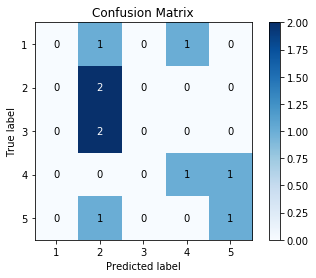

------------------------------------------------------------
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

CV score for class cluster_1 is 0.8719211822660098
CV score for class cluster_2 is 0.7902298850574713
CV score for class cluster_3 is 0.7795566502463055
CV score for class cluster_4 is 0.9536124794745485
CV score for class cluster_5 is 0.8374384236453202

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       0.67      1.00      0.80         2
           3       1.00      0.50      0.67         2
           4       1.00      0.50      0.67         2
           5       0.67      1.00      0.80         2

    accuracy                           0.80        10
   macro avg       0.87      0.80      0.79        10
weighted avg       0.87      0.80      0.79        10


True 

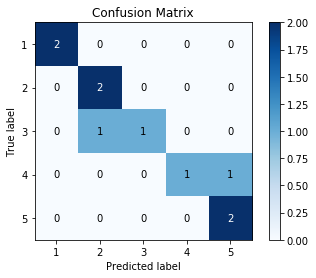

------------------------------------------------------------
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

CV score for class cluster_1 is 0.8263546798029556
CV score for class cluster_2 is 0.8025451559934318
CV score for class cluster_3 is 0.7101806239737275
CV score for class cluster_4 is 0.9766009852216749
CV score for class cluster_5 is 0.861247947454844

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       0.50      1.00      0.67         2
           3       0.00      0.00      0.00         2
           4       0.00      0.00      

/Users/clausholm/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


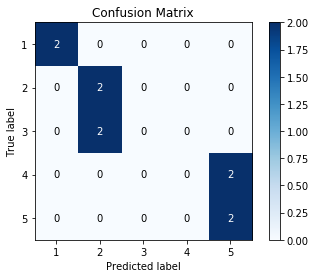

------------------------------------------------------------
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features=1,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

CV score for class cluster_1 is 0.8719211822660098
CV score for class cluster_2 is 0.814039408866995
CV score for class cluster_3 is 0.814039408866995
CV score for class cluster_4 is 0.9536124794745485
CV score for class cluster_5 is 0.8723316912972084

              precision    recall  f1-score   support

           1       1.00      0.50      0.67         2
           2       0.50      1.00    

/Users/clausholm/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


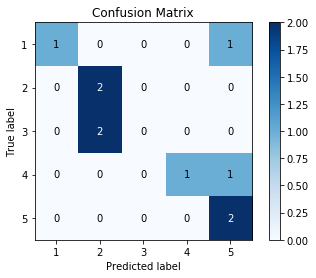

------------------------------------------------------------
ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=0, verbose=0,
                     warm_start=False)

CV score for class cluster_1 is 0.8608374384236454
CV score for class cluster_2 is 0.8144499178981938
CV score for class cluster_3 is 0.7910509031198686
CV score for class cluster_4 is 0.9536124794745485
CV score for class cluster_5 is 0.8723316912972084

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       0.67      1.00      0.80 

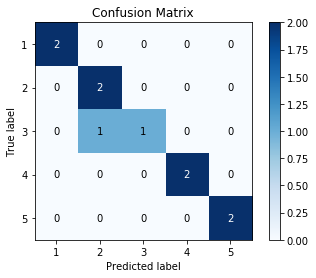

------------------------------------------------------------
GaussianNB(priors=None, var_smoothing=1e-09)

CV score for class cluster_1 is 0.6732348111658456
CV score for class cluster_2 is 0.8025451559934318
CV score for class cluster_3 is 0.3838259441707717
CV score for class cluster_4 is 0.9642857142857143
CV score for class cluster_5 is 0.8493431855500821

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       0.50      1.00      0.67         2
           3       0.00      0.00      0.00         2
           4       0.67      1.00      0.80         2
           5       1.00      0.50      0.67         2

    accuracy                           0.70        10
   macro avg       0.63      0.70      0.63        10
weighted avg       0.63      0.70      0.63        10


True Cluster      [5, 5, 4, 4, 3, 3, 2, 2, 1, 1]

Predicted Cluster [4, 5, 4, 4, 2, 2, 2, 2, 1, 1]


/Users/clausholm/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


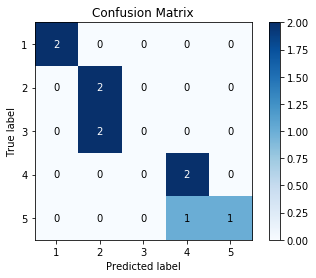

------------------------------------------------------------
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

CV score for class cluster_1 is 0.8604269293924466
CV score for class cluster_2 is 0.7906403940886699
CV score for class cluster_3 is 0.8255336617405583
CV score for class cluster_4 is 0.9417077175697864
CV score for class cluster_5 is 0.8727422003284072

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       0.50      1.00      0.67         2
           3       0.00      0.00      0.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2

    accuracy                           0.80        10
   macro avg       0.70      0.80      0.73        10

/Users/clausholm/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


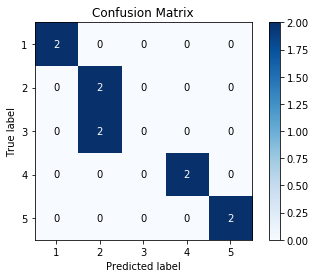

------------------------------------------------------------
MLPClassifier(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=1000, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=10000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

CV score for class cluster_1 is 0.5816912972085385
CV score for class cluster_2 is 0.7688834154351395
CV score for class cluster_3 is 0.7561576354679803
CV score for class cluster_4 is 0.9298029556650246
CV score for class cluster_5 is 0.8961412151067324

              precision    recall  f1-score   support

           1       0.50      1.00      0.67         2
           2       0.50      1.00      0.67         

/Users/clausholm/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


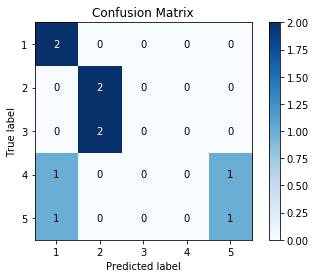

------------------------------------------------------------
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

CV score for class cluster_1 is 0.8148604269293925
CV score for class cluster_2 is 0.8017241379310344
CV score for class cluster_3 is 0.7684729064039408
CV score for class cluster_4 is 0.9766009852216749
CV score for class cluster_5 is 0.8616584564860427

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       0.50      1.00      0.67         2
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         2
           5       0.50      1.00      0.67         2

    accuracy                           0.60        10
   macro avg       0.40      0.60      0.47        10
weighted avg       0.40      0.60      0.47        10


True Cluster      [5, 5, 4, 4, 3, 3, 2, 2, 1, 1]

Predict

/Users/clausholm/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


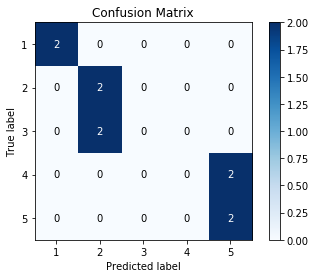

------------------------------------------------------------
GaussianProcessClassifier(copy_X_train=True, kernel=1**2 * RBF(length_scale=1),
                          max_iter_predict=100, multi_class='one_vs_rest',
                          n_jobs=None, n_restarts_optimizer=0,
                          optimizer='fmin_l_bfgs_b', random_state=None,
                          warm_start=False)

CV score for class cluster_1 is 0.8489326765188835
CV score for class cluster_2 is 0.6629720853858785
CV score for class cluster_3 is 0.8255336617405583
CV score for class cluster_4 is 0.9536124794745485
CV score for class cluster_5 is 0.8723316912972084

              precision    recall  f1-score   support

           1       0.20      1.00      0.33         2
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         2

    accuracy          

/Users/clausholm/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


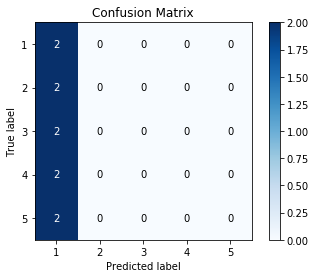

------------------------------------------------------------
QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

CV score for class cluster_1 is 0.8604269293924466
CV score for class cluster_2 is 0.5459770114942528
CV score for class cluster_3 is 0.8255336617405583
CV score for class cluster_4 is 0.9536124794745485
CV score for class cluster_5 is 0.8723316912972084

              precision    recall  f1-score   support

           1       0.20      0.50      0.29         2
           2       0.40      1.00      0.57         2
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         2

    accuracy                           0.30        10
   macro avg       0.12      0.30      0.17        10
weighted avg       0.12      0.30      0.17        10


True Cluster      [5, 5, 4, 4, 3, 3, 2, 2, 1, 1]

Predicted Cluster 

/Users/clausholm/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/clausholm/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/clausholm/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/clausholm/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/clausholm/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/clausholm/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  war

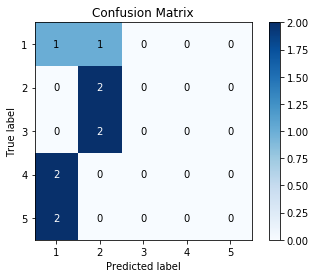

------------------------------------------------------------


,f1-score,precision,recall,support,model,True Cluster,Predicted Cluster
1,0.000000,0.000000,0.0,2.0,"LogisticRegression(C=1.0, class_weight=None, d...","[5, 5, 4, 4, 3, 3, 2, 2, 1, 1]","[5, 2, 2, 5, 2, 1, 2, 1, 3, 4]"
2,0.333333,0.250000,0.5,2.0,"LogisticRegression(C=1.0, class_weight=None, d...","[5, 5, 4, 4, 3, 3, 2, 2, 1, 1]","[5, 2, 2, 5, 2, 1, 2, 1, 3, 4]"
3,0.000000,0.000000,0.0,2.0,"LogisticRegression(C=1.0, class_weight=None, d...","[5, 5, 4, 4, 3, 3, 2, 2, 1, 1]","[5, 2, 2, 5, 2, 1, 2, 1, 3, 4]"
4,0.000000,0.000000,0.0,2.0,"LogisticRegression(C=1.0, class_weight=None, d...","[5, 5, 4, 4, 3, 3, 2, 2, 1, 1]","[5, 2, 2, 5, 2, 1, 2, 1, 3, 4]"
5,0.500000,0.500000,0.5,2.0,"LogisticRegression(C=1.0, class_weight=None, d...","[5, 5, 4, 4, 3, 3, 2, 2, 1, 1]","[5, 2, 2, 5, 2, 1, 2, 1, 3, 4]"
accuracy,0.200000,0.200000,0.2,0.2,"LogisticRegression(C=1.0, class_weight=None, d...","[5, 5, 4, 4, 3, 3, 2, 2, 1, 1]","[5, 2, 2, 5, 2, 1, 2, 1, 3, 4]"
macro avg,0.166667,0.150000,0.2,10.0,"LogisticRegression(C=1.0, class_weight=None, d...","[5, 5, 4, 4, 3, 3, 2, 2, 1, 1]","[5, 2, 2, 5, 2, 1, 2, 1, 3, 4]"
weighted avg,0.166667,0.150000,0.2,10.0,"LogisticRegression(C=1.0, class_weight=None, d...","[5, 5, 4, 4, 3, 3, 2, 2, 1, 1]","[5, 2, 2, 5, 2, 1, 2, 1, 3, 4]"
1,0.000000,0.000000,0.0,2.0,"LinearDiscriminantAnalysis(n_components=None, ...","[5, 5, 4, 4, 3, 3, 2, 2, 1, 1]","[5, 2, 4, 5, 2, 2, 2, 2, 2, 4]"
2,0.500000,0.333333,1.0,2.0,"LinearDiscriminantAnalysis(n_components=None, ...","[5, 5, 4, 4, 3, 3, 2, 2, 1, 1]","[5, 2, 4, 5, 2, 2, 2, 2, 2, 4]"


In [14]:
class_names = ['cluster_1', 'cluster_2', 'cluster_3', 'cluster_4', 'cluster_5']
scores = []
preds = np.zeros((len(test), len(class_names)))

train_values = train.drop(columns=['cluster_1', 'cluster_2', 'cluster_3', 'cluster_4', 'cluster_5'])
test_values = test.drop(columns=['cluster_1', 'cluster_2', 'cluster_3', 'cluster_4', 'cluster_5'])

# fit scaler on data
#train_values = scaler.fit_transform(train_values)
#test_values = scaler.fit_transform(test_values)

dfFinal = pd.DataFrame()

for name, model in models:
    print(model)
    print('')
    
    for i, class_name in enumerate(class_names):
        train_target = train[class_name]    
        cv_score = np.mean(cross_val_score(estimator = model, X = train_values, 
                                          y = train_target, cv = 3, scoring = 'accuracy'))
        scores.append(cv_score)
        print('CV score for class {} is {}'.format(class_name, cv_score))
        model.fit(train_values, train_target)
        preds[:,i] = model.predict_proba(test_values)[:,1]
    print('')
    
    test_clusters = [x + 1 for x in np.argmax(test[class_names].values, axis = 1)] 
    pred_clusters = [x + 1 for x in np.argmax(preds, axis = 1)] 
    
    t = metrics.classification_report(test_clusters, pred_clusters)
    print(t) 
    print('')
    
    print('True Cluster     ', test_clusters)
    print('')
    print('Predicted Cluster', pred_clusters)
    # Plot non-normalized confusion matrix
    skplt.metrics.plot_confusion_matrix(test_clusters, pred_clusters, normalize=False)
    #plt.savefig(folder_name+'/'+ str(name) + '_' + identify + '.png')
    plt.show()
    
    print('------------------------------------------------------------')
    
    # Return classification report as dictionary for saving
    report = metrics.classification_report(test_clusters, pred_clusters, output_dict=True)

    # create dataframe from classification dictionary
    df3 = pd.DataFrame(report).transpose()
    
    # Setup dataframe to be saved
    df3['model'] = str(model)
    df3['True Cluster'] = str(test_clusters)
    df3['Predicted Cluster'] = str(pred_clusters)
    dfFinal = dfFinal.append(df3, sort=False)
    
    #new_row = {'f1-score':'-', 'precision':'-', 'recall':'-', 'support':'-', 'model':'-', 'True Cluster':'-', 'Predicted Cluster':'-'}
    #s = pd.Series(new_row, name='-')
    #append row to the dataframe
    #dfFinal = dfFinal.append(s)

# Create datetime for time of results    
now = datetime.datetime.now()
now = str(now.strftime("%Y-%m-%d %H:%M:%S"))

# Save Results to csv file in folder
#dfFinal.to_csv(folder_name+'/'+identify+'_'+now+'.csv', sep=';', decimal=',' )
    
dfFinal

In [15]:
train_target

Adel Tawil - Unsere Lieder                                                0
Alec Benjamin Feat. Alessia Cara - Let Me Down Slowly                     0
Annenmaykantereit - Marie                                                 0
Ariana Grande - 7 rings                                                   1
Ava Max - Sweet but Psycho                                                0
Bausa - Was Du Liebe nennst                                               1
C Arma - Yapma - Radio Edit                                               0
Calvin Harris & Ragnbone Man - Giant                                      0
Childish Gambino - This Is America                                        0
Chris Brown - Undecided                                                   0
Christine and The Queens - Doesn't matter_EnglischVersion                 0
David Guetta ft. Bebe Rexha J Balvin - Say My Name                        0
Daya - New                                                                0
Dean Lewis -

Feature ranking:
1. feature 26 (0.053414)
2. feature 25 (0.053282)
3. feature 24 (0.048940)
4. feature 7 (0.047902)
5. feature 27 (0.046539)
6. feature 23 (0.038977)
7. feature 17 (0.037918)
8. feature 14 (0.037812)
9. feature 16 (0.037691)
10. feature 28 (0.037174)
11. feature 2 (0.036181)
12. feature 21 (0.036020)
13. feature 5 (0.035960)
14. feature 0 (0.035894)
15. feature 20 (0.032310)
16. feature 19 (0.032164)
17. feature 8 (0.031591)
18. feature 1 (0.031111)
19. feature 29 (0.026698)
20. feature 10 (0.026622)
21. feature 22 (0.026570)
22. feature 30 (0.026342)
23. feature 18 (0.024778)
24. feature 4 (0.024387)
25. feature 15 (0.022299)
26. feature 13 (0.022221)
27. feature 3 (0.022045)
28. feature 6 (0.021373)
29. feature 9 (0.019531)
30. feature 11 (0.014269)
31. feature 12 (0.011986)


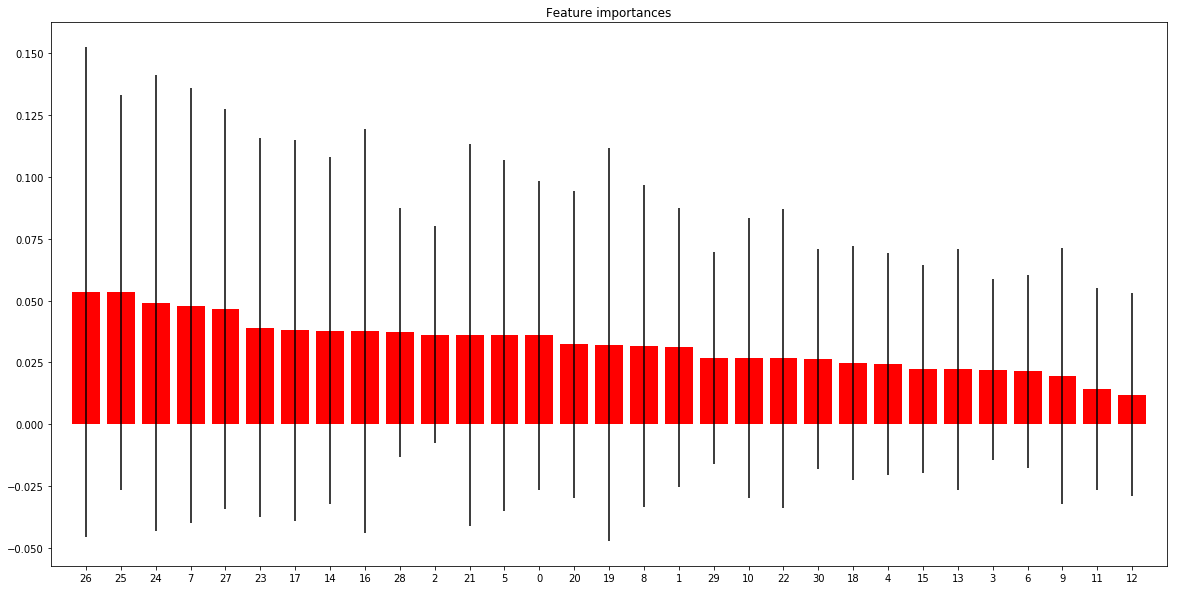

In [16]:
# Set classifier to use for feature importance calculation
model = ExtraTreesClassifier(n_estimators=100, random_state=0)

# Fit the model
model.fit(train_values, train_target)
importances = model.feature_importances_

std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(train_values.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure(figsize=(20,10))
plt.title("Feature importances")
plt.bar(range(train_values.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(train_values.shape[1]), indices)
plt.xlim([-1, train_values.shape[1]])
plt.show()